# Smart Factory Energy Prediction

We are going to develop a machine learning model that can accurately predict the energy consumption of industrial equipment (`equipment_energy_consumption`) based on the data collected from the factory's sensor network. This will help the facility managers optimize their operations for energy efficiency and cost reduction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data_df = pd.read_csv("E:/Mechademy/DS-Intern-Assignment-main/data/data.csv")

# Dataset Overview

Sensor data from a manufacturing facility including:
- Zone-wise temperature & humidity
- External weather conditions
- Energy consumption metrics

**Target variable**: `equipment_energy_consumption` (Wh)

---

##  Features Summary

### Time
- `timestamp`: Date and time (`YYYY-MM-DD HH:MM:SS`)

### Energy Metrics
- `equipment_energy_consumption`: Target – energy used by equipment (Wh)
- `lighting_energy`: Lighting energy use (Wh)

### Factory Zones (1–9)
Each has:
- `zoneX_temperature` (°C)
- `zoneX_humidity` (%)

### Weather
- `outdoor_temperature`, `outdoor_humidity`
- `atmospheric_pressure`, `wind_speed`
- `visibility_index`, `dew_point`

### Others
- `random_variable1`, `random_variable2`



In [3]:
print("Shape:", data_df.shape)
display(data_df.head())
data_df.info()
data_df.describe()

Shape: (16857, 29)


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [4]:
# Check for missing values
missing = data_df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1                826


#  Data Exploration Summary

We found issues needing cleanup:

- **Data Types**: Many numeric columns (e.g., `equipment_energy_consumption`, `zone1_temperature`) are incorrectly stored as `object`.
- **Missing Values**: Several features have missing data. Example:
  - `equipment_energy_consumption`: 16013 non-null
  - `zone1_temperature`: 15990 non-null

Next steps: fix data types and handle missing values before modeling.

# Data cleaning

In [5]:
# Convert timestamp to datetime
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])

# Extract time features
data_df['hour'] = data_df['timestamp'].dt.hour
data_df['day'] = data_df['timestamp'].dt.day
data_df['weekday'] = data_df['timestamp'].dt.weekday
data_df['month'] = data_df['timestamp'].dt.month

In [6]:
# List object-type columns
object_cols = data_df.select_dtypes(include='object').columns.tolist()
print("Object-type columns:", object_cols)


Object-type columns: ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']


In [7]:
# Clean and convert object columns to float
for col in object_cols:
    data_df[col] = pd.to_numeric(data_df[col].replace(['N/A', '--', ' '], np.nan), errors='coerce')

In [8]:
print(data_df.dtypes[object_cols])  # Should now be float64 or similar

equipment_energy_consumption    float64
lighting_energy                 float64
zone1_temperature               float64
zone1_humidity                  float64
zone2_temperature               float64
dtype: object


In [9]:
print("Missing values after cleaning:")
print(data_df.isnull().sum())

Missing values after cleaning:
timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       8

## Missing Values
#### First, we will remove all the rows where the 'equipment_energy_consumption' values are missing.

In [10]:
# Step 1: Drop rows where the target value is missing
data_df.dropna(subset=['equipment_energy_consumption'], inplace=True)
print("Missing values after cleaning:")
print(data_df.isnull().sum())

Missing values after cleaning:
timestamp                         0
equipment_energy_consumption      0
lighting_energy                 806
zone1_temperature               891
zone1_humidity                  843
zone2_temperature               876
zone2_humidity                  823
zone3_temperature               757
zone3_humidity                  818
zone4_temperature               771
zone4_humidity                  739
zone5_temperature               786
zone5_humidity                  749
zone6_temperature               799
zone6_humidity                  796
zone7_temperature               738
zone7_humidity                  765
zone8_temperature               801
zone8_humidity                  742
zone9_temperature               728
zone9_humidity                  832
outdoor_temperature             766
atmospheric_pressure            796
outdoor_humidity                757
wind_speed                      779
visibility_index                768
dew_point                       7

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15945 entries, 0 to 16856
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     15945 non-null  datetime64[ns]
 1   equipment_energy_consumption  15945 non-null  float64       
 2   lighting_energy               15139 non-null  float64       
 3   zone1_temperature             15054 non-null  float64       
 4   zone1_humidity                15102 non-null  float64       
 5   zone2_temperature             15069 non-null  float64       
 6   zone2_humidity                15122 non-null  float64       
 7   zone3_temperature             15188 non-null  float64       
 8   zone3_humidity                15127 non-null  float64       
 9   zone4_temperature             15174 non-null  float64       
 10  zone4_humidity                15206 non-null  float64       
 11  zone5_temperature             151

#### Now we filled missing values using the **median**, which is robust to outliers and the skewed nature of sensor data.

In [12]:
# Step 2: List of all numerical sensor/weather/random variables with missing data
fill_cols = [
    'lighting_energy',
    'zone1_temperature', 'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
    'zone3_temperature', 'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
    'zone5_temperature', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
    'zone7_temperature', 'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
    'zone9_temperature', 'zone9_humidity',
    'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
    'wind_speed', 'visibility_index', 'dew_point',
    'random_variable1', 'random_variable2'
]

# Step 3: Fill missing values using median (robust to skewed sensor data)
for col in fill_cols:
    data_df[col] = data_df[col].fillna(data_df[col].median())

# Step 4: Confirm that no missing values remain
missing = data_df.isnull().sum()


In [13]:
print(data_df[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].corr())

                              random_variable1  random_variable2  \
random_variable1                      1.000000          0.277244   
random_variable2                      0.277244          1.000000   
equipment_energy_consumption         -0.015799         -0.011094   

                              equipment_energy_consumption  
random_variable1                                 -0.015799  
random_variable2                                 -0.011094  
equipment_energy_consumption                      1.000000  


#### Accordingto the poor correlation  we are going to drop these columns

In [14]:
# Drop the random variables
data_df.drop(columns=['random_variable1', 'random_variable2'], inplace=True)

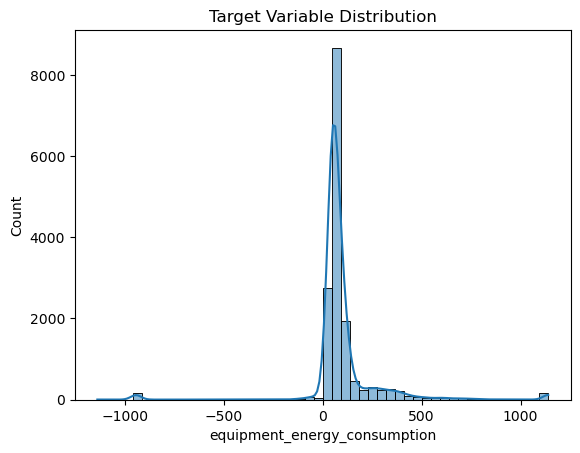

In [15]:
sns.histplot(data_df['equipment_energy_consumption'], bins=50, kde=True)
plt.title("Target Variable Distribution")
plt.show()

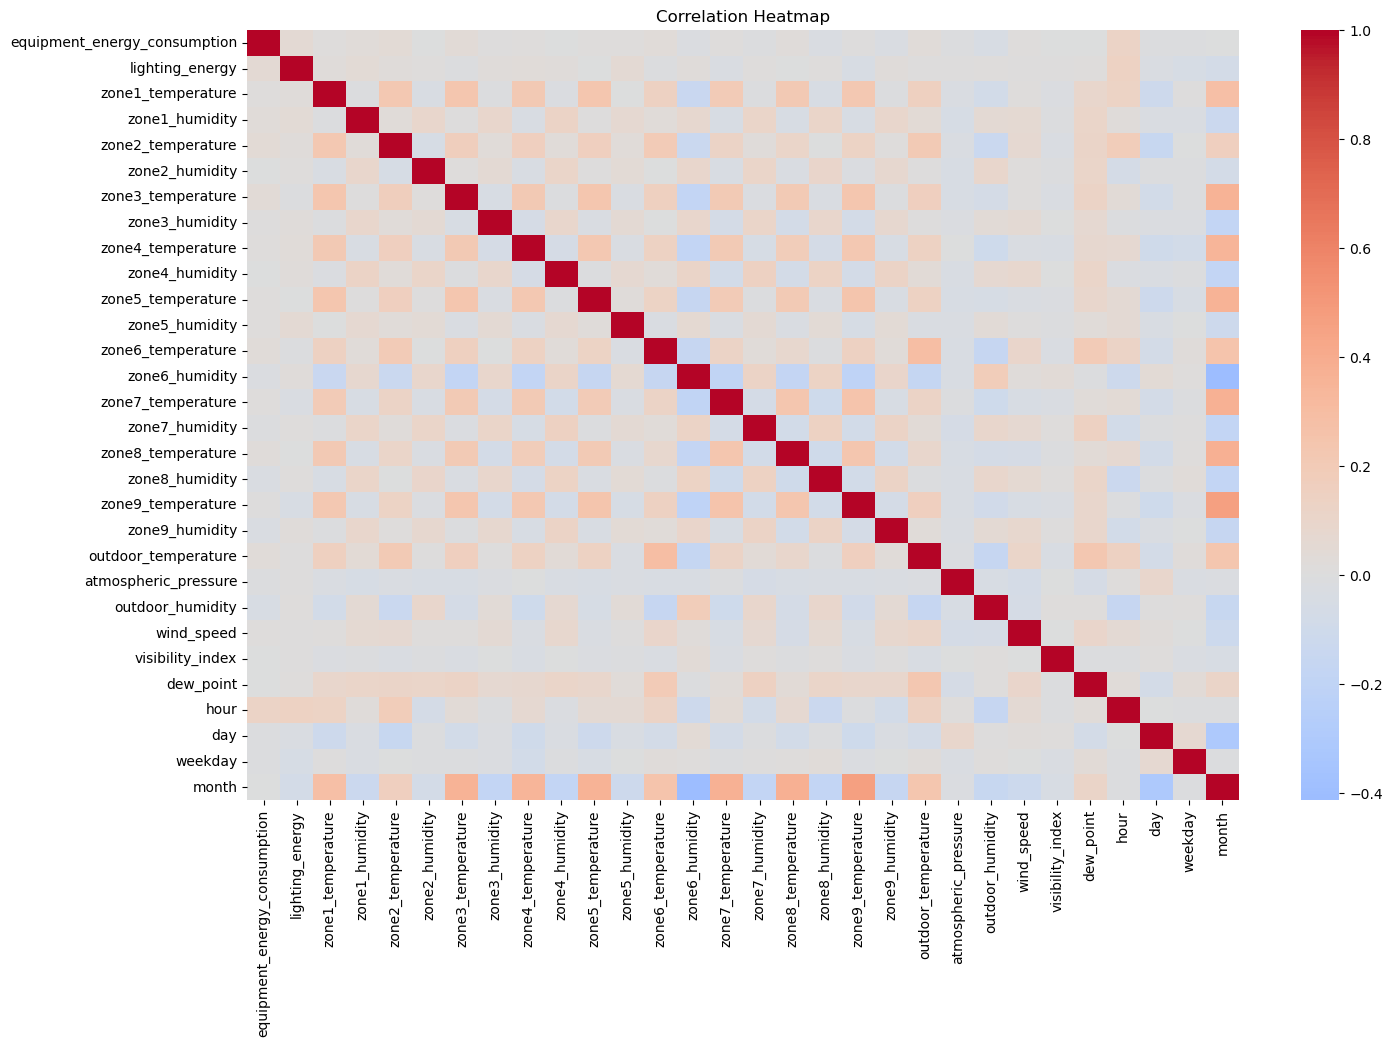

In [16]:
plt.figure(figsize=(16, 10))
corr = data_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Model Evaluation

We evaluated model performance using:

- **MAE (Mean Absolute Error)**: Measures average error magnitude
- **RMSE (Root Mean Squared Error)**: Penalizes larger errors more heavily
- **R² Score**: Indicates how well the model explains variance in energy consumption

These metrics help assess accuracy and reliability for predicting `equipment_energy_consumption`.

In [17]:
# Drop timestamp (we already extracted time-based features)
data_df.drop(columns=['timestamp'], inplace=True)

# Optional: Drop 'day' if you want a cleaner model (you can try both ways)
# df.drop(columns=['day'], inplace=True)

# Define the target
y = data_df['equipment_energy_consumption']

# Define the features
X = data_df.drop(columns=['equipment_energy_consumption'])

### Linear Regression
We are going train a **Linear Regression** model to predict `equipment_energy_consumption`.

In [18]:


# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Initialize the model
lr_model = LinearRegression()

# Step 3: Fit the model on training data
lr_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = lr_model.predict(X_test)

In [19]:
# Import math for square root
import math

# Step 1: Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 2: Display results
print("Model Performance on Test Set:")
print(f" MAE  : {mae:.2f} Wh")
print(f" RMSE : {rmse:.2f} Wh")
print(f" R²   : {r2:.4f}")

Model Performance on Test Set:
 MAE  : 71.85 Wh
 RMSE : 162.05 Wh
 R²   : 0.0218


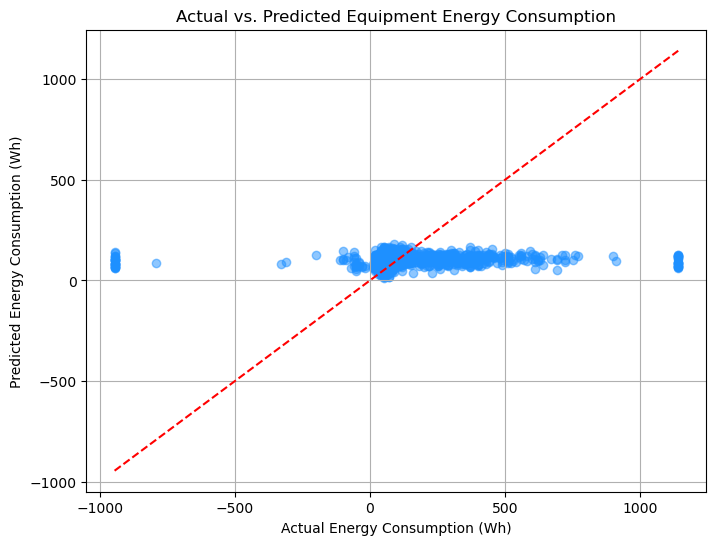

In [20]:
# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Energy Consumption (Wh)')
plt.ylabel('Predicted Energy Consumption (Wh)')
plt.title('Actual vs. Predicted Equipment Energy Consumption')
plt.grid(True)
plt.show()

The **Linear Regression** model showed **weak performance**, likely due to **non-linear patterns** in the data that it couldn't capture effectively.

Next steps: explore more flexible models (**Random Forests**)

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,   # Number of trees
    max_depth=None,     # Let it grow until pure
    random_state=42,
    n_jobs=-1           # Use all cores for faster training
)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Predict on test set
rf_pred = rf_model.predict(X_test)


In [29]:
# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = math.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Show results
print(" Random Forest Model Performance:")
print(f" MAE  : {rf_mae:.2f} Wh")
print(f" RMSE : {rf_rmse:.2f} Wh")
print(f" R²   : {rf_r2:.4f}")


 Random Forest Model Performance:
 MAE  : 67.55 Wh
 RMSE : 159.45 Wh
 R²   : 0.0529


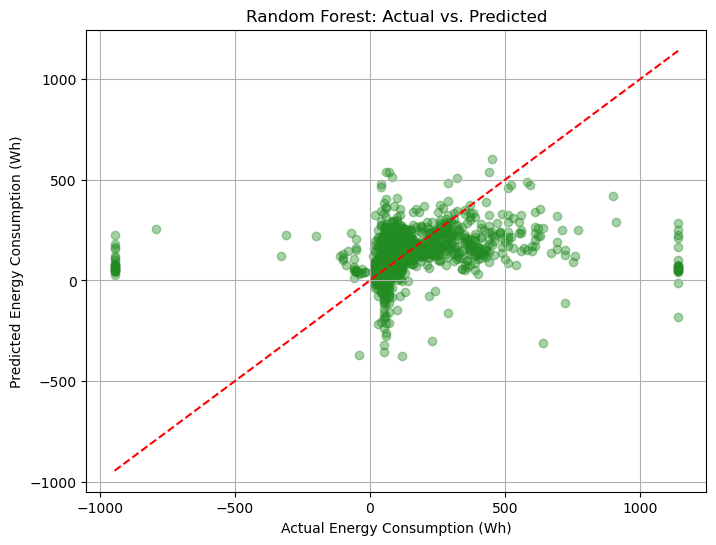

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.4, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Energy Consumption (Wh)')
plt.ylabel('Predicted Energy Consumption (Wh)')
plt.title('Random Forest: Actual vs. Predicted')
plt.grid(True)
plt.show()

 Slight improvement, but still limited predictive power. 
 Tuned Random Forest using **GridSearchCV**.

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4]
}


In [26]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    n_jobs=-1,           # Use all CPUs
    scoring='neg_root_mean_squared_error',  # RMSE
    verbose=2
)


In [27]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [28]:
print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Re-evaluate
mae = mean_absolute_error(y_test, y_pred_tuned)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2 = r2_score(y_test, y_pred_tuned)

print(" Tuned Random Forest Performance:")
print(f" MAE  : {mae:.2f} Wh")
print(f" RMSE : {rmse:.2f} Wh")
print(f" R²   : {r2:.4f}")


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}
🛠️ Tuned Random Forest Performance:
➡️ MAE  : 60.97 Wh
➡️ RMSE : 153.74 Wh
➡️ R²   : 0.1195


The **final model** showed a **significant improvement**, but performance is still **limited by the available features**.

###  Key Insights
- Equipment energy use is **loosely correlated** with temperature and humidity across zones
- **Time features** (e.g., hour, weekday) revealed **cyclic patterns**
- **Random variables** were irrelevant and were **removed**
- Model accuracy could improve with **additional operational or machine-specific data**
  